In [2]:
import numpy as np
#import mlflow
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
from PIL import Image
from dataset import *
from save_load import *
from NN_library.AutoUnet.AutoUnet import *
from NN_library.AutoUnet.train_AutoUnet import *
%load_ext autoreload
%autoreload 2

#mlflow.autolog()

Using device: cuda


In [3]:
data = dataset_seq()
geometry, damage, imp_shrinkage, obs_shrinkage, stiffness = data.__getitem__(1000)
loaders = get_loaders(data, 16)

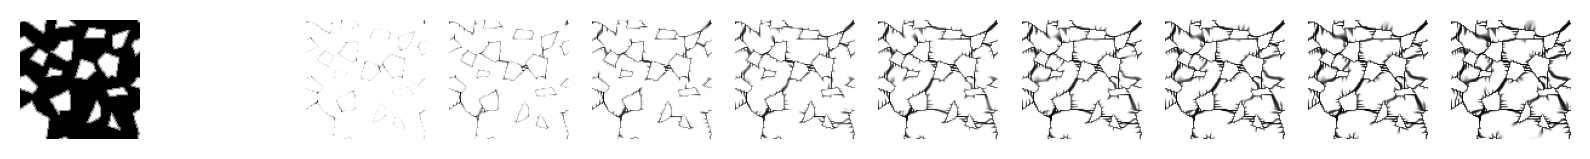

In [4]:
fig, axs = plt.subplots(nrows=1, ncols=11, figsize=(10, 1), dpi=200)
axs.flat[0].imshow(geometry[0], cmap='Greys')
axs.flat[0].set_axis_off()
for i in range(1,11):
    axs.flat[i].imshow(damage[i], cmap='Greys')
    axs.flat[i].set_axis_off()

In [14]:
name = 'NN_library/AutoUnet/AutoUnet'
args = {'lr' : 0.000001, 'epochs' : 20, 'dev' : dev, 'name' : name}

In [4]:
unet = AutoUNet()

In [5]:
torch.cuda.empty_cache() 

In [6]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 7697345


In [15]:
unet = load_network(unet, args['name']+'_19', args)

In [16]:
losses_train, losses_val = train(unet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  760.0360865503
Epoch: 0 batch: 100 mean train loss:  739.0323575464
Epoch: 0 batch: 200 mean train loss:  977.6762406453
Epoch: 0 batch: 300 mean train loss:  737.9902747422
Epoch: 0 batch: 400 mean train loss:  799.5601187017
Epoch: 0 batch: 500 mean train loss:  585.2902693397
Epoch: 0 batch: 600 mean train loss:  653.9369346541
Epoch: 0 batch: 700 mean train loss:  826.7046299044
Epoch: 0 mean train loss:  822.7245487062 mean val. rec. loss:  904.8452758789
Epoch: 1 batch: 0 mean train loss:  675.3121032830
Epoch: 1 batch: 100 mean train loss:  1000.5963215925
Epoch: 1 batch: 200 mean train loss:  760.2808312729
Epoch: 1 batch: 300 mean train loss:  651.1167435646
Epoch: 1 batch: 400 mean train loss:  766.5651969632
Epoch: 1 batch: 500 mean train loss:  977.1908159671
Epoch: 1 batch: 600 mean train loss:  592.0218868287
Epoch: 1 batch: 700 mean train loss:  837.0435326152
Epoch: 1 mean train loss:  822.1292878423 mean val. rec. loss:  902.05950927

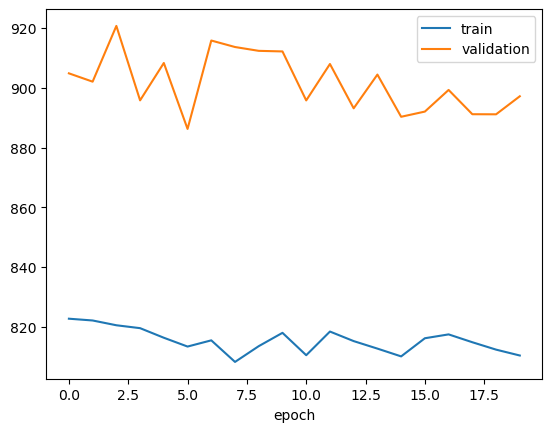

In [17]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])

## Train with Convnet

In [5]:
from NN_library.ConvNet.ConvNet import *

name = 'NN_library/AutoUnet/AutoUnet_w_Conv'
conv_name = 'NN_library/ConvNet/Conv_w_AutoUnet'

In [25]:
args = {'lr' : 0.00000001, 'epochs' : 20, 'dev' : dev, 'name' : name, 'conv_name' : 'NN_library/ConvNet/Conv_w_AutoUnet'}

In [26]:
unet = AutoUNet()
convnet = ConvNet(16)

convnet = load_network(convnet, 'NN_library/ConvNet/Conv_w_AutoUnet_6', args)

In [27]:
unet = load_network(unet, 'NN_library/AutoUnet/AutoUnet_w_Conv_6', args)  

In [28]:
losses_train, losses_val = train_w_Conv(unet, convnet, loaders, args)

Epoch: 0 batch: 0 mean train loss:  6.1735994623
Epoch: 0 batch: 100 mean train loss:  7.8150154467
Epoch: 0 batch: 200 mean train loss:  9.7353573951
Epoch: 0 batch: 300 mean train loss:  7.6849112518
Epoch: 0 batch: 400 mean train loss:  11.7318273059
Epoch: 0 batch: 500 mean train loss:  10.3253612282
Epoch: 0 batch: 600 mean train loss:  7.2432457841
Epoch: 0 batch: 700 mean train loss:  7.2466076483
Epoch: 0 mean train loss:  8.3975528914 mean val. rec. loss:  9.2193107605
Epoch: 1 batch: 0 mean train loss:  9.0806537253
Epoch: 1 batch: 100 mean train loss:  7.7401228035
Epoch: 1 batch: 200 mean train loss:  7.8991994198
Epoch: 1 batch: 300 mean train loss:  7.7262611036
Epoch: 1 batch: 400 mean train loss:  5.8515783851
Epoch: 1 batch: 500 mean train loss:  7.2075955798
Epoch: 1 batch: 600 mean train loss:  6.5831857394
Epoch: 1 batch: 700 mean train loss:  8.6231104899
Epoch: 1 mean train loss:  8.4023426482 mean val. rec. loss:  9.4654493332
Epoch: 2 batch: 0 mean train loss:  

KeyboardInterrupt: 

In [ ]:
plt.plot(losses_train)
plt.plot(losses_val)
plt.xlabel('epoch')
plt.legend(['train', 'validation'])